In [1]:
from __future__ import print_function

In [2]:
import pandas as pd
import scipy.stats as stats
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#first look at data, let's look at just the first 2 rows
nov16 = pd.read_csv('/Users/alexandrasmith/Documents/DataScience/Intro_to_Data_Science/irish_EV_stations_data/201611a.txt',sep='\t',names = ["Datetime","Time","ChargePointID","ChargePointType","Status","Latitude_Longitude","Address","Latitude","Longitude"
], nrows=2)

In [4]:
nov16

,Datetime,Time,ChargePointID,ChargePointType,Status,Latitude_Longitude,Address,Latitude,Longitude
0,20161102,640,CP:C2YMD-A/B,StandardType2,Part,"-7.204457,53.863850","The Grove, Ballyjamesduff, County Cavan",-7.204457,53.863850
1,20161102,640,CP:C4ZH3,StandardType2,OOS,"-7.361237,53.994044","Off Farnham Street, Cavan Town, County Cavan",-7.361237,53.994044


In [5]:
#load all data with correct headers (I decided the column names based on info about dataset and looking at first 2 rows above)
nov16 = pd.read_csv('/Users/alexandrasmith/Documents/DataScience/Intro_to_Data_Science/irish_EV_stations_data/201611a.txt',sep='\t',names = ["Datetime","Time","ChargePointID","ChargePointType","Status","Latitude_Longitude","Address","Latitude","Longitude"
])

In [6]:
nov16.head()

,Datetime,Time,ChargePointID,ChargePointType,Status,Latitude_Longitude,Address,Latitude,Longitude
0,20161102,640,CP:C2YMD-A/B,StandardType2,Part,"-7.204457,53.863850","The Grove, Ballyjamesduff, County Cavan",-7.204457,53.863850
1,20161102,640,CP:C4ZH3,StandardType2,OOS,"-7.361237,53.994044","Off Farnham Street, Cavan Town, County Cavan",-7.361237,53.994044
2,20161102,640,CP:C4547-A/B,StandardType2,OOC,"-7.082769,53.834939","Main Street, Virginia, County Cavan",-7.082769,53.834939
3,20161102,640,CP:C6GPC,StandardType2,Part,"-8.686061,52.358365","The Turrets, Off Main Street, Charleville, Cou...",-8.686061,52.358365
4,20161102,640,CP:C6BTQ,StandardType2,Part,"-8.520562,51.709117","Fire Brigade Car Park, New Road, Kinsale, Coun...",-8.520562,51.709117


In [7]:
nov16.shape

(1213520, 9)

In [8]:
nov16.columns

Index([u'Datetime', u'Time', u'ChargePointID', u'ChargePointType', u'Status',
       u'Latitude_Longitude', u'Address', u'Latitude', u'Longitude'],
      dtype='object')

In [9]:
#now i need to add the other months
dec16 = pd.read_csv('/Users/alexandrasmith/Documents/DataScience/Intro_to_Data_Science/irish_EV_stations_data/201612a.txt',sep='\t',names = ["Datetime","Time","ChargePointID","ChargePointType","Status","Latitude_Longitude","Address","Latitude","Longitude"
])

In [10]:
dec16.head()

,Datetime,Time,ChargePointID,ChargePointType,Status,Latitude_Longitude,Address,Latitude,Longitude
0,20161201,0,CP:C67D2,StandardType2,OOC,"-6.955983,52.702794","The Parade, Bagenalstown, County Carlow",-6.955983,52.702794
1,20161201,0,CP:C4GTM,StandardType2,OOC,"-6.736986,52.801581","Inner Relief Road, Tullow, County Carlow",-6.736986,52.801581
2,20161201,0,CP:C4ZH3,StandardType2,OOS,"-7.361237,53.994044","Off Farnham Street, Cavan Town, County Cavan",-7.361237,53.994044
3,20161201,0,CP:C4W54,StandardType2,OOC,"-9.647069,52.683379","Public Car Park, East End, Kilkee, County Clare",-9.647069,52.683379
4,20161201,0,CP:C6WY4,StandardType2,OOC,"-9.290289,53.027069","Hydro Hotel, Main Street, Lisdoonvarna, County...",-9.290289,53.027069


In [11]:
#in the head above, it looks like some of the times are 0, but after looking at the original data files, the 0s represent midnight

In [12]:
dec16.shape

(1085735, 9)

In [13]:
dec16.columns
#i named the data column 'Datetime' because later on this will be helpful when adding the 'Time' column to 'Datetime'

Index([u'Datetime', u'Time', u'ChargePointID', u'ChargePointType', u'Status',
       u'Latitude_Longitude', u'Address', u'Latitude', u'Longitude'],
      dtype='object')

In [14]:
#two ways to add decemeber rows to november rows
#1: append
#nov16.append(dec16,ignore_index=True)
#2: concat --> this one seems faster and is more recommended
full_data = pd.concat([nov16,dec16])

In [15]:
full_data.head() #november data up top looks good

,Datetime,Time,ChargePointID,ChargePointType,Status,Latitude_Longitude,Address,Latitude,Longitude
0,20161102,640,CP:C2YMD-A/B,StandardType2,Part,"-7.204457,53.863850","The Grove, Ballyjamesduff, County Cavan",-7.204457,53.863850
1,20161102,640,CP:C4ZH3,StandardType2,OOS,"-7.361237,53.994044","Off Farnham Street, Cavan Town, County Cavan",-7.361237,53.994044
2,20161102,640,CP:C4547-A/B,StandardType2,OOC,"-7.082769,53.834939","Main Street, Virginia, County Cavan",-7.082769,53.834939
3,20161102,640,CP:C6GPC,StandardType2,Part,"-8.686061,52.358365","The Turrets, Off Main Street, Charleville, Cou...",-8.686061,52.358365
4,20161102,640,CP:C6BTQ,StandardType2,Part,"-8.520562,51.709117","Fire Brigade Car Park, New Road, Kinsale, Coun...",-8.520562,51.709117


In [16]:
full_data.tail() #december data on the bottom looks good! except there are a bunch of NaNs, i'll take care of those later

,Datetime,Time,ChargePointID,ChargePointType,Status,Latitude_Longitude,Address,Latitude,Longitude
1085730,20161227,1445,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1085731,20161227,1735,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1085732,20161228,1435,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1085733,20161228,1440,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1085734,20161228,1700,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [17]:
#now let's load up the rest of the months and add them all to the full_data df
jan17 = pd.read_csv('/Users/alexandrasmith/Documents/DataScience/Intro_to_Data_Science/irish_EV_stations_data/201701a.txt',sep='\t',names = ["Datetime","Time","ChargePointID","ChargePointType","Status","Latitude_Longitude","Address","Latitude","Longitude"
])
feb17 = pd.read_csv('/Users/alexandrasmith/Documents/DataScience/Intro_to_Data_Science/irish_EV_stations_data/201702a.txt',sep='\t',names = ["Datetime","Time","ChargePointID","ChargePointType","Status","Latitude_Longitude","Address","Latitude","Longitude"
])
march17 = pd.read_csv('/Users/alexandrasmith/Documents/DataScience/Intro_to_Data_Science/irish_EV_stations_data/201703a.txt',sep='\t',names = ["Datetime","Time","ChargePointID","ChargePointType","Status","Latitude_Longitude","Address","Latitude","Longitude"
])
april17 = pd.read_csv('/Users/alexandrasmith/Documents/DataScience/Intro_to_Data_Science/irish_EV_stations_data/201704a.txt',sep='\t',names = ["Datetime","Time","ChargePointID","ChargePointType","Status","Latitude_Longitude","Address","Latitude","Longitude"
])
may17 = pd.read_csv('/Users/alexandrasmith/Documents/DataScience/Intro_to_Data_Science/irish_EV_stations_data/201705a.txt',sep='\t',names = ["Datetime","Time","ChargePointID","ChargePointType","Status","Latitude_Longitude","Address","Latitude","Longitude"
])
june17 = pd.read_csv('/Users/alexandrasmith/Documents/DataScience/Intro_to_Data_Science/irish_EV_stations_data/201706a.txt',sep='\t',names = ["Datetime","Time","ChargePointID","ChargePointType","Status","Latitude_Longitude","Address","Latitude","Longitude"
])
july17 = pd.read_csv('/Users/alexandrasmith/Documents/DataScience/Intro_to_Data_Science/irish_EV_stations_data/201707a.txt',sep='\t',names = ["Datetime","Time","ChargePointID","ChargePointType","Status","Latitude_Longitude","Address","Latitude","Longitude"
])
aug17 = pd.read_csv('/Users/alexandrasmith/Documents/DataScience/Intro_to_Data_Science/irish_EV_stations_data/201708a.txt',sep='\t',names = ["Datetime","Time","ChargePointID","ChargePointType","Status","Latitude_Longitude","Address","Latitude","Longitude"
])
sept17 = pd.read_csv('/Users/alexandrasmith/Documents/DataScience/Intro_to_Data_Science/irish_EV_stations_data/201709a.txt',sep='\t',names = ["Datetime","Time","ChargePointID","ChargePointType","Status","Latitude_Longitude","Address","Latitude","Longitude"
])
oct17 = pd.read_csv('/Users/alexandrasmith/Documents/DataScience/Intro_to_Data_Science/irish_EV_stations_data/201710a.txt',sep='\t',names = ["Datetime","Time","ChargePointID","ChargePointType","Status","Latitude_Longitude","Address","Latitude","Longitude"
])
nov17 = pd.read_csv('/Users/alexandrasmith/Documents/DataScience/Intro_to_Data_Science/irish_EV_stations_data/201711a.txt',sep='\t',names = ["Datetime","Time","ChargePointID","ChargePointType","Status","Latitude_Longitude","Address","Latitude","Longitude"
])
dec17 = pd.read_csv('/Users/alexandrasmith/Documents/DataScience/Intro_to_Data_Science/irish_EV_stations_data/201712a.txt',sep='\t',names = ["Datetime","Time","ChargePointID","ChargePointType","Status","Latitude_Longitude","Address","Latitude","Longitude"
])

/Applications/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
#from working through the data i know that there are a bunch of rows without a time that i need to remove
#at the bottom of the month of august (all are dated 2017-08-31)
aug17.tail()
#yup, the bottom rows are screwed up

,Datetime,Time,ChargePointID,ChargePointType,Status,Latitude_Longitude,Address,Latitude,Longitude
1232868,CP:C24W8,2017-08-31,Occ,20,40,22,15,-8.482733,51.919755
1232869,CP:SC53,2017-08-31,Part,21,10,22,05,-6.953681,55.049487
1232870,CP:C87HD,2017-08-31,Part,21,15,23,59,-8.852424,53.514180
1232871,CP:C3BMR-A/B,2017-08-31,Part,22,30,23,15,-6.255804,53.332326
1232872,Unknown,2017-08-31,Unknown,09,55,10,00,0.000000,0.000000


In [19]:
aug17.shape

(1232873, 9)

In [20]:
#find where the data starts going bad
#aug17.loc[aug17['Time'] == 955]
aug17[-1570:]

,Datetime,Time,ChargePointID,ChargePointType,Status,Latitude_Longitude,Address,Latitude,Longitude
1231303,20170831,2359,CP:C9LZK,CHAdeMO,Occ,"-8.189447,52.864558","Abbey Court Hotel, Dublin Road, Nenagh, County...",-8.189447,52.864558
1231304,20170831,2359,CP:RC08,CHAdeMO,OOS,"-6.217682,54.367680","Barbican Centra, Dromore Road (A1), Banbridge,...",-6.217682,54.367680
1231305,20170831,955,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
1231306,CP:C67D2,2017-08-31,OOC,00,00,03,40,-6.955983,52.702794
1231307,CP:C67D2,2017-08-31,OOC,20,25,23,59,-6.955983,52.702794
1231308,CP:C6FD3,2017-08-31,OOS,00,00,09,55,-6.933468,52.836332
1231309,CP:C6FD3,2017-08-31,OOS,10,00,23,59,-6.933468,52.836332
1231310,CP:C9X23,2017-08-31,OOC,00,00,09,55,-8.983370,52.845081
1231311,CP:C9X23,2017-08-31,OOC,10,00,23,59,-8.983370,52.845081
1231312,CP:C4FVM,2017-08-31,OOS,00,00,09,55,-9.346292,52.928911


In [21]:
aug17[-1568:] #find the exact index where the data gets funky

,Datetime,Time,ChargePointID,ChargePointType,Status,Latitude_Longitude,Address,Latitude,Longitude
1231305,20170831,955,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
1231306,CP:C67D2,2017-08-31,OOC,00,00,03,40,-6.955983,52.702794
1231307,CP:C67D2,2017-08-31,OOC,20,25,23,59,-6.955983,52.702794
1231308,CP:C6FD3,2017-08-31,OOS,00,00,09,55,-6.933468,52.836332
1231309,CP:C6FD3,2017-08-31,OOS,10,00,23,59,-6.933468,52.836332
1231310,CP:C9X23,2017-08-31,OOC,00,00,09,55,-8.983370,52.845081
1231311,CP:C9X23,2017-08-31,OOC,10,00,23,59,-8.983370,52.845081
1231312,CP:C4FVM,2017-08-31,OOS,00,00,09,55,-9.346292,52.928911
1231313,CP:C4FVM,2017-08-31,OOS,10,00,23,59,-9.346292,52.928911
1231314,CP:C6Q3G,2017-08-31,OOS,00,00,09,55,-8.889570,51.620831


In [22]:
#copy all the good rows to a Cleaned version of the aug17 dataset
aug17Cleaned = aug17[:-1568]

In [23]:
aug17Cleaned.tail()

,Datetime,Time,ChargePointID,ChargePointType,Status,Latitude_Longitude,Address,Latitude,Longitude
1231300,20170831,2359,CP:RC08,FastAC43,OOS,"-6.217682,54.367680","Barbican Centra, Dromore Road (A1), Banbridge,...",-6.217682,54.367680
1231301,20170831,2359,CP:RC08,ComboCCS,OOS,"-6.217682,54.367680","Barbican Centra, Dromore Road (A1), Banbridge,...",-6.217682,54.367680
1231302,20170831,2359,CP:C8W2F,CHAdeMO,OOS,"-8.955524,53.667639","McHugh's Texaco Service Station, Galway Road, ...",-8.955524,53.667639
1231303,20170831,2359,CP:C9LZK,CHAdeMO,Occ,"-8.189447,52.864558","Abbey Court Hotel, Dublin Road, Nenagh, County...",-8.189447,52.864558
1231304,20170831,2359,CP:RC08,CHAdeMO,OOS,"-6.217682,54.367680","Barbican Centra, Dromore Road (A1), Banbridge,...",-6.217682,54.367680


In [24]:
#putting all the months (14) of data together
full_data = pd.concat([full_data,jan17,feb17,march17,april17,may17,june17,july17,aug17Cleaned,sept17,oct17,dec17])

In [25]:
#awesome, now let's take a look
full_data.head()

,Datetime,Time,ChargePointID,ChargePointType,Status,Latitude_Longitude,Address,Latitude,Longitude
0,20161102,640,CP:C2YMD-A/B,StandardType2,Part,"-7.204457,53.863850","The Grove, Ballyjamesduff, County Cavan",-7.204457,53.863850
1,20161102,640,CP:C4ZH3,StandardType2,OOS,"-7.361237,53.994044","Off Farnham Street, Cavan Town, County Cavan",-7.361237,53.994044
2,20161102,640,CP:C4547-A/B,StandardType2,OOC,"-7.082769,53.834939","Main Street, Virginia, County Cavan",-7.082769,53.834939
3,20161102,640,CP:C6GPC,StandardType2,Part,"-8.686061,52.358365","The Turrets, Off Main Street, Charleville, Cou...",-8.686061,52.358365
4,20161102,640,CP:C6BTQ,StandardType2,Part,"-8.520562,51.709117","Fire Brigade Car Park, New Road, Kinsale, Coun...",-8.520562,51.709117


In [26]:
full_data.shape #danggggg, that's a lot of entries...over 17 million

(17312968, 9)

In [27]:
full_data.dtypes #okay so i'm going to want to change the datetime to type datetime in a bit

Datetime               object
Time                   object
ChargePointID          object
ChargePointType        object
Status                 object
Latitude_Longitude     object
Address                object
Latitude              float64
Longitude             float64
dtype: object

In [28]:
#let's get rid of a duplicate column
del full_data['Latitude_Longitude'] #delete duplicate column of latitude and longitude

In [29]:
full_data.head(10)

,Datetime,Time,ChargePointID,ChargePointType,Status,Address,Latitude,Longitude
0,20161102,640,CP:C2YMD-A/B,StandardType2,Part,"The Grove, Ballyjamesduff, County Cavan",-7.204457,53.863850
1,20161102,640,CP:C4ZH3,StandardType2,OOS,"Off Farnham Street, Cavan Town, County Cavan",-7.361237,53.994044
2,20161102,640,CP:C4547-A/B,StandardType2,OOC,"Main Street, Virginia, County Cavan",-7.082769,53.834939
3,20161102,640,CP:C6GPC,StandardType2,Part,"The Turrets, Off Main Street, Charleville, Cou...",-8.686061,52.358365
4,20161102,640,CP:C6BTQ,StandardType2,Part,"Fire Brigade Car Park, New Road, Kinsale, Coun...",-8.520562,51.709117
5,20161102,640,CP:C7GRZ,StandardType2,OOC,"Navenny Street, Ballybofey, County Donegal",-7.783045,54.797965
6,20161102,640,CP:C7DGY,StandardType2,OOC,"Market Yard Car Park, Main Street, Ballyshanno...",-8.188621,54.501145
7,20161102,640,CP:C9HRF,StandardType2,OOS,"The Aura Lesiure Centre, Ballymacool Street, L...",-7.751151,54.946769
8,20161102,640,CP:C75HT,StandardType2,OOS,"Hospital Car Park, Kilmacrennan Road, Letterke...",-7.731468,54.961006
9,20161102,640,CP:C7FDW,StandardType2,OOC,"Justice Walsh Car Park, Off Bank Lane, Letterk...",-7.734554,54.951508


In [30]:
full_data.dtypes #check types of columns

Datetime            object
Time                object
ChargePointID       object
ChargePointType     object
Status              object
Address             object
Latitude           float64
Longitude          float64
dtype: object

In [31]:
#convert Datetime to str to combine date (Datetime) and time (Time)
full_data.Datetime = full_data.Datetime.astype(str)

#convert Time to str to combine date (Datetime) and time (Time)
full_data.Time = full_data.Time.astype(str)

In [32]:
full_data.dtypes
#even though the type of Datetime and Time is still 'object', it seemed to help with respect to eliminating the following error when adding Time to Datetime below:
#TypeError: sequence item 0: expected string, int found

Datetime            object
Time                object
ChargePointID       object
ChargePointType     object
Status              object
Address             object
Latitude           float64
Longitude          float64
dtype: object

In [33]:
#add Time to Datetime column
full_data['Datetime'] = full_data['Datetime'].str.cat(full_data['Time'].values.astype(str), sep='')

In [34]:
full_data.head()

,Datetime,Time,ChargePointID,ChargePointType,Status,Address,Latitude,Longitude
0,20161102640,640,CP:C2YMD-A/B,StandardType2,Part,"The Grove, Ballyjamesduff, County Cavan",-7.204457,53.863850
1,20161102640,640,CP:C4ZH3,StandardType2,OOS,"Off Farnham Street, Cavan Town, County Cavan",-7.361237,53.994044
2,20161102640,640,CP:C4547-A/B,StandardType2,OOC,"Main Street, Virginia, County Cavan",-7.082769,53.834939
3,20161102640,640,CP:C6GPC,StandardType2,Part,"The Turrets, Off Main Street, Charleville, Cou...",-8.686061,52.358365
4,20161102640,640,CP:C6BTQ,StandardType2,Part,"Fire Brigade Car Park, New Road, Kinsale, Coun...",-8.520562,51.709117


In [35]:
#now i don't need the Time column anymone (since it was added to the Datetime column)
del full_data['Time']

In [36]:
full_data.head()

,Datetime,ChargePointID,ChargePointType,Status,Address,Latitude,Longitude
0,20161102640,CP:C2YMD-A/B,StandardType2,Part,"The Grove, Ballyjamesduff, County Cavan",-7.204457,53.863850
1,20161102640,CP:C4ZH3,StandardType2,OOS,"Off Farnham Street, Cavan Town, County Cavan",-7.361237,53.994044
2,20161102640,CP:C4547-A/B,StandardType2,OOC,"Main Street, Virginia, County Cavan",-7.082769,53.834939
3,20161102640,CP:C6GPC,StandardType2,Part,"The Turrets, Off Main Street, Charleville, Cou...",-8.686061,52.358365
4,20161102640,CP:C6BTQ,StandardType2,Part,"Fire Brigade Car Park, New Road, Kinsale, Coun...",-8.520562,51.709117


In [37]:
full_data.dtypes
#now Datetime is ready to be converted to type datetime

Datetime            object
ChargePointID       object
ChargePointType     object
Status              object
Address             object
Latitude           float64
Longitude          float64
dtype: object

In [38]:
#i tried converting Datetime to type datetime but had some difficulties
#so i eventually proceeded this way:
full_data['Date'] = full_data.Datetime.str.slice(0,8)
full_data['Time'] = full_data.Datetime.str.slice(8)
full_data['Time'] = full_data['Time'].apply(lambda val: '{:0>4}'.format(val))
full_data['Datetime'] = full_data['Date'] + " " + full_data["Time"]

In [39]:
full_data.head()

,Datetime,ChargePointID,ChargePointType,Status,Address,Latitude,Longitude,Date,Time
0,20161102 0640,CP:C2YMD-A/B,StandardType2,Part,"The Grove, Ballyjamesduff, County Cavan",-7.204457,53.863850,20161102,0640
1,20161102 0640,CP:C4ZH3,StandardType2,OOS,"Off Farnham Street, Cavan Town, County Cavan",-7.361237,53.994044,20161102,0640
2,20161102 0640,CP:C4547-A/B,StandardType2,OOC,"Main Street, Virginia, County Cavan",-7.082769,53.834939,20161102,0640
3,20161102 0640,CP:C6GPC,StandardType2,Part,"The Turrets, Off Main Street, Charleville, Cou...",-8.686061,52.358365,20161102,0640
4,20161102 0640,CP:C6BTQ,StandardType2,Part,"Fire Brigade Car Park, New Road, Kinsale, Coun...",-8.520562,51.709117,20161102,0640


In [40]:
#let's make sure the times at midnight (which looked like 0 before) made it through the transition
full_data.loc[full_data['Datetime'] == '20170101 0'] #-->what a midnight time may look like
#yup looks good

,Datetime,ChargePointID,ChargePointType,Status,Address,Latitude,Longitude,Date,Time


In [41]:
#now let's finall convert Datetime to type datetime in column FormattedDatetime
full_data['FormattedDatetime'] = pd.to_datetime(full_data.Datetime,format="%Y%m%d %H%M")

In [42]:
#let's check that it changed the type
full_data.dtypes
#YAY!

Datetime                     object
ChargePointID                object
ChargePointType              object
Status                       object
Address                      object
Latitude                    float64
Longitude                   float64
Date                         object
Time                         object
FormattedDatetime    datetime64[ns]
dtype: object

In [43]:
full_data.head()

,Datetime,ChargePointID,ChargePointType,Status,Address,Latitude,Longitude,Date,Time,FormattedDatetime
0,20161102 0640,CP:C2YMD-A/B,StandardType2,Part,"The Grove, Ballyjamesduff, County Cavan",-7.204457,53.863850,20161102,0640,2016-11-02 06:40:00
1,20161102 0640,CP:C4ZH3,StandardType2,OOS,"Off Farnham Street, Cavan Town, County Cavan",-7.361237,53.994044,20161102,0640,2016-11-02 06:40:00
2,20161102 0640,CP:C4547-A/B,StandardType2,OOC,"Main Street, Virginia, County Cavan",-7.082769,53.834939,20161102,0640,2016-11-02 06:40:00
3,20161102 0640,CP:C6GPC,StandardType2,Part,"The Turrets, Off Main Street, Charleville, Cou...",-8.686061,52.358365,20161102,0640,2016-11-02 06:40:00
4,20161102 0640,CP:C6BTQ,StandardType2,Part,"Fire Brigade Car Park, New Road, Kinsale, Coun...",-8.520562,51.709117,20161102,0640,2016-11-02 06:40:00


In [44]:
#now we can get rid of the Datetime, Date, and Time columns
del full_data['Datetime']
del full_data['Date']
del full_data['Time']

full_data.head()

,ChargePointID,ChargePointType,Status,Address,Latitude,Longitude,FormattedDatetime
0,CP:C2YMD-A/B,StandardType2,Part,"The Grove, Ballyjamesduff, County Cavan",-7.204457,53.863850,2016-11-02 06:40:00
1,CP:C4ZH3,StandardType2,OOS,"Off Farnham Street, Cavan Town, County Cavan",-7.361237,53.994044,2016-11-02 06:40:00
2,CP:C4547-A/B,StandardType2,OOC,"Main Street, Virginia, County Cavan",-7.082769,53.834939,2016-11-02 06:40:00
3,CP:C6GPC,StandardType2,Part,"The Turrets, Off Main Street, Charleville, Cou...",-8.686061,52.358365,2016-11-02 06:40:00
4,CP:C6BTQ,StandardType2,Part,"Fire Brigade Car Park, New Road, Kinsale, Coun...",-8.520562,51.709117,2016-11-02 06:40:00


In [45]:
#now I want to start looking at the pattern of when the charge points are being used or not
"""to do that I want to convert the categorical variable 'Status', stored as string type,
into indicator variables using get_dummies()"""

""""from the original description of the data:
The available status has been omitted as it can be implied by the absence of a record"""

print("What are the different values of 'Status':",full_data.Status.unique())
print()
print("How many of each value:\n",full_data.Status.value_counts())

What are the different values of 'Status': ['Part' 'OOS' 'OOC' 'Occ' nan]

How many of each value:
 Part    5247602
OOS     4900677
OOC     4226165
Occ     2932814
Name: Status, dtype: int64


In [46]:
"""let's take a look at the data per month.
there should be more data (about double) in november and december (11 and 12) because we have two months of data for each.
"""
full_data.groupby([full_data.FormattedDatetime.dt.month]).count()

,ChargePointID,ChargePointType,Status,Address,Latitude,Longitude,FormattedDatetime
FormattedDatetime,,,,,,,
1,1171376,1197349,1197349,1197349,1197865,1197865,1197865
2,1074354,1093466,1093466,1093466,1093546,1093546,1093546
3,1206475,1224596,1224596,1224596,1224835,1224835,1224835
4,1033588,1045865,1045865,1045865,1046061,1046061,1046061
5,1201633,1218803,1218803,1218803,1218812,1218812,1218812
6,1106024,1124141,1124141,1124141,1124418,1124418,1124418
7,899427,913344,913344,913344,915755,915755,915755
8,1211445,1231305,1231305,1231305,1231305,1231305,1231305
9,2766504,2810372,2810372,2810372,2810404,2810404,2810404


'cool. but now that i think about it, I think I only need that data of when the charge points are\nbeing used to build a model that predicts when they are being used.\n'

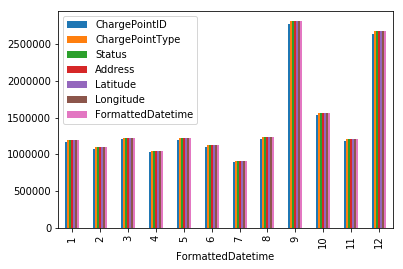

In [47]:
"""we need to find out how many entries there should be for each particular day,
and the difference between that and the actual number represents when the status is 'available'
"""

full_data.groupby([full_data.FormattedDatetime.dt.month]).count().plot(kind='bar')

"""cool. but now that i think about it, I think I only need that data of when the charge points are
being used to build a model that predicts when they are being used.
"""

In [48]:
#now let's make the variable 'Status' into dummie variables

status_dummies = pd.get_dummies(full_data.Status).astype(int)
status_dummies.head()

,OOC,OOS,Occ,Part
0,0,0,0,1
1,0,1,0,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [49]:
#let's reappend the status features to the original dataset and drop the original 'Status' column:
full_data = pd.concat(
    [full_data,status_dummies],
    axis=1) #remember that concatenating columns means axis=1!
full_data.drop('Status',inplace=True,axis=1)
full_data.head()

,ChargePointID,ChargePointType,Address,Latitude,Longitude,FormattedDatetime,OOC,OOS,Occ,Part
0,CP:C2YMD-A/B,StandardType2,"The Grove, Ballyjamesduff, County Cavan",-7.204457,53.863850,2016-11-02 06:40:00,0,0,0,1
1,CP:C4ZH3,StandardType2,"Off Farnham Street, Cavan Town, County Cavan",-7.361237,53.994044,2016-11-02 06:40:00,0,1,0,0
2,CP:C4547-A/B,StandardType2,"Main Street, Virginia, County Cavan",-7.082769,53.834939,2016-11-02 06:40:00,1,0,0,0
3,CP:C6GPC,StandardType2,"The Turrets, Off Main Street, Charleville, Cou...",-8.686061,52.358365,2016-11-02 06:40:00,0,0,0,1
4,CP:C6BTQ,StandardType2,"Fire Brigade Car Park, New Road, Kinsale, Coun...",-8.520562,51.709117,2016-11-02 06:40:00,0,0,0,1


In [50]:
#let's remove the first 3 characters in the ChargePointID column as they all have 'CP:' at the beginning, which is unnecessary
full_data['ChargePointID'] = full_data['ChargePointID'].str[3:]

In [51]:
full_data.head() #awesome!

,ChargePointID,ChargePointType,Address,Latitude,Longitude,FormattedDatetime,OOC,OOS,Occ,Part
0,C2YMD-A/B,StandardType2,"The Grove, Ballyjamesduff, County Cavan",-7.204457,53.863850,2016-11-02 06:40:00,0,0,0,1
1,C4ZH3,StandardType2,"Off Farnham Street, Cavan Town, County Cavan",-7.361237,53.994044,2016-11-02 06:40:00,0,1,0,0
2,C4547-A/B,StandardType2,"Main Street, Virginia, County Cavan",-7.082769,53.834939,2016-11-02 06:40:00,1,0,0,0
3,C6GPC,StandardType2,"The Turrets, Off Main Street, Charleville, Cou...",-8.686061,52.358365,2016-11-02 06:40:00,0,0,0,1
4,C6BTQ,StandardType2,"Fire Brigade Car Park, New Road, Kinsale, Coun...",-8.520562,51.709117,2016-11-02 06:40:00,0,0,0,1
